### <b>3분 만에 전이 학습(Transfer Learning)을 활용한 인공지능 서비스 만들기</b>

* 본 프로젝트에서는 세 가지 기능을 합쳐서 순식간에 상용 인공지능 서비스를 제작합니다.
    1. 이미지 크롤링(image crawling) 혹은 크롤링 라이브러리
    2. 전이 학습(transfer learning)
    3. 웹 API 개발
* 이 프로젝트에서 만들어 볼 것은 <b>마동석/김종국/이병헌</b> 분류기(classifier)입니다.
* 단 <b>3분</b> 만에 인공지능 개발의 전체 과정을 진행합니다.
    * 데이터 수집/정제
    * 인공지능 모델 학습
    * 학습된 모델 배포
* 한글 폰트 설치 이후에 <b>[런타임] - [런타임 다시 시작]</b>을 수행해야 합니다.

In [ ]:
# 한글 폰트 설치하기 (꼭! 설치가 완료되면 [런타임 다시 시작]을 누르고 다시 실행하기)
!apt install fonts-nanum -y

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정하기
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
matplotlib.font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')

In [ ]:
# 필요한 라이브러리 설치하기
!git clone https://github.com/ndb796/bing_image_downloader

Cloning into 'bing_image_downloader'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 86 (delta 17), reused 10 (delta 10), pack-reused 64
Unpacking objects: 100% (86/86), done.


#### <b>1. 이미지 크롤링을 활용한 학습 이미지 수집</b>

* 수집한 이미지를 저장하기 위한 폴더를 생성하고, 필요한 함수를 정의합니다.

In [ ]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader


directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)

#### 이미지 크롤링을 통한 데이터셋 구축

In [ ]:
query = '전신사진'
downloader.download(query, limit=100,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 85)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://watermark.lovepik.com/photo/50139/9646.jpg_wh1200.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://t1.daumcdn.net/cfile/blog/2736173456CA955A1C)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://images.freeimages.com/images/premium/previews/3698/36981220-full-body-picture-of-a-young-fashion-model-posing.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://4.bp.blogspot.com/-lv22Dnt8TZw/XM7vjqy0apI/AAAAAAAAYfM/Kxs8mr7nRxwPB9k4kalIamk1XPMzfwQrgCLcBGAs/s1600/201803221138634467_1.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://i.pinimg.com/originals/a3/5d/a8/a35da8f66d279f82bf0e136de65773a0.png)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://t1.daumcdn.net/cfile/blog/270DE840548FA3B70B)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (http://file3.knowhow.or.kr/attachment/52097:L/1)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (http://file3.knowhow.or.kr/attachment/52100:L/1)
#8 파일 다운로드가 완료되었습니다.
#9 이미지 다운로드 (https://3.bp.blogspot.com/-zf-Pd4lNe58/XM7vlAZNEF

In [ ]:
query = 'pinterest 상반신'
downloader.download(query, limit=100,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 85)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://cdn.wccftech.com/wp-content/uploads/2019/04/pinterestlogo.png)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://b-i.forbesimg.com/jeffbercovici/files/2013/11/pinterest-icon_logo-1024x1015.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (http://blogthumb2.naver.net/20151223_76/hanil0320_1450833704434fomdH_JPEG/017-%B1%E8%C0%B1%C1%F6%B4%D4-.jpg?type=w2)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://i.pinimg.com/736x/fa/9e/b3/fa9eb389b9905fab45d1ea3447cc27e7.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://i.pinimg.com/736x/58/80/6d/58806dd04311ec767eab918a6ebf0a88.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (http://image.kmib.co.kr/online_image/2016/0229/201602291414_61180010405874_1.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://i.pinimg.com/736x/48/93/33/489333e3fc06d1c067f618d5b8d14c38.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (https://i.pinimg.com/736x/5b/38/fa/5b38fa589fd9527351b0798b120211f1.jpg)
#8 파일 다운로드가 완료되었습니다.
#9 이미지 다운로드 (http

In [ ]:
query = '앉은 사진'
downloader.download(query, limit=100,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 85)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://img.lovepik.com/element/40034/2094.png_860.png)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (http://blogfiles.naver.net/20150603_245/spinebestkim_1433296583827mpvXq_JPEG/%B1迵%BC%F6%BA%B4%BF%F8-230.jpg)
[Info] Issue getting: http://blogfiles.naver.net/20150603_245/spinebestkim_1433296583827mpvXq_JPEG/%B1迵%BC%F6%BA%B4%BF%F8-230.jpg
[Error] 'ascii' codec can't encode character '\u8ff5' in position 58: ordinal not in range(128)
#2 이미지 다운로드 (https://en.pimg.jp/038/166/702/1/38166702.jpg)
[Error] Invalid image, not saving https://en.pimg.jp/038/166/702/1/38166702.jpg
[Info] Issue getting: https://en.pimg.jp/038/166/702/1/38166702.jpg
[Error] No active exception to reraise
#2 이미지 다운로드 (https://i.pinimg.com/originals/d4/c8/94/d4c89490e8f11d3c7c8857b8d73c9fec.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (http://imgnews.naver.com/image/segye/2008/11/13/20081113001303_0.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://img1.daumcdn.net/t

In [ ]:
query = '셀카'
downloader.download(query, limit=100,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 85)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&amp;fname=https:%2F%2Fblog.kakaocdn.net%2Fdn%2FylYXK%2Fbtq54pmsPbG%2FGziSYOKhfRILOJH9YPtud0%2Fimg.jpg)
[Info] Issue getting: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&amp;fname=https:%2F%2Fblog.kakaocdn.net%2Fdn%2FylYXK%2Fbtq54pmsPbG%2FGziSYOKhfRILOJH9YPtud0%2Fimg.jpg
[Error] HTTP Error 403: Forbidden
#1 이미지 다운로드 (https://www.nemopan.com/files/attach/images/6294/573/729/012/08267a4635a71a9ff74183ecb78f85fc.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://i.pinimg.com/originals/af/44/47/af4447b519f8e3d12ed09375105875b1.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://2.bp.blogspot.com/-SQOzUSG71zs/XLnckNdI_HI/AAAAAAAAUOQ/ByJkKmzVfGIH56649FzFBGZIzEM-D0v8QCLcBGAs/s1600/172f86d9950f5da9a6d76850f94dd2ed6f248fa5.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://4.bp.blogspot.com/-kRTMIwuQVU4/XD4ESBr0QFI/AAAAAAAAINE/v-yHF5ybgu0eRXnLV_D_G84MQecP5hBrgCLcBGAs/s1

#### <b>2. PyTorch를 이용한 전이 학습(Transfer Learning)</b>

* 전이 학습(transfer learning)의 동작 과정을 간략화한 것은 다음과 같습니다.

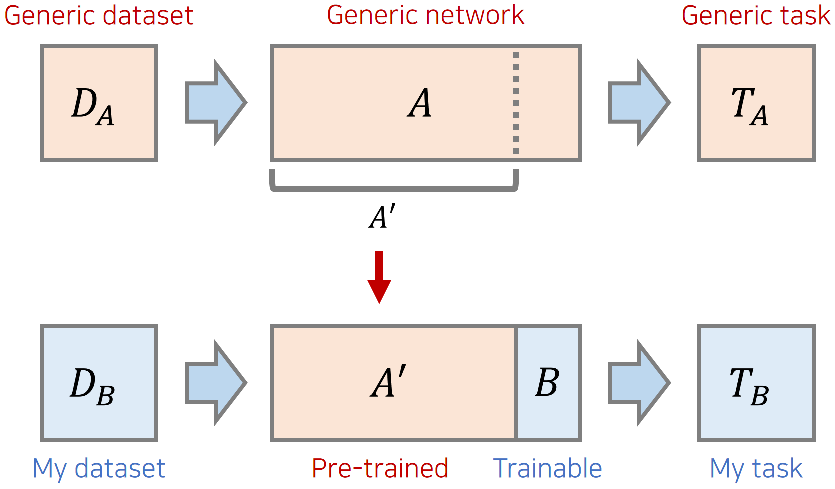

* 학습을 위해 필요한 라이브러리를 불러옵니다.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

* 데이터셋을 불러옵니다.

In [ ]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './custom_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=5, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=5, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 340
테스트 데이터셋 크기: 60
클래스: ['pinterest 상반신', '셀카', '앉은 사진', '전신사진']


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


* 간단히 이미지를 시각화해 봅시다.

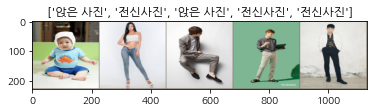

In [ ]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

* 학습할 CNN 딥러닝 모델 객체를 초기화합니다.

In [ ]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 4개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 4)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

* 학습을 진행합니다.

In [ ]:
num_epochs = 100
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#0 Loss: 1.0207 Acc: 57.0588% Time: 14.7481s
#1 Loss: 0.3454 Acc: 88.2353% Time: 22.4620s
#2 Loss: 0.3399 Acc: 88.2353% Time: 30.4690s
#3 Loss: 0.1534 Acc: 94.1176% Time: 38.2675s
#4 Loss: 0.2068 Acc: 92.3529% Time: 46.1645s
#5 Loss: 0.1527 Acc: 94.7059% Time: 54.0856s
#6 Loss: 0.1421 Acc: 95.2941% Time: 64.3024s
#7 Loss: 0.1640 Acc: 95.0000% Time: 73.0311s
#8 Loss: 0.1990 Acc: 93.5294% Time: 81.1869s
#9 Loss: 0.1246 Acc: 95.5882% Time: 89.1514s
#10 Loss: 0.0461 Acc: 98.8235% Time: 97.0771s
#11 Loss: 0.0434 Acc: 98.8235% Time: 104.9804s
#12 Loss: 0.0917 Acc: 96.7647% Time: 112.8840s
#13 Loss: 0.0200 Acc: 99.4118% Time: 120.8968s
#14 Loss: 0.0537 Acc: 97.9412% Time: 128.8122s
#15 Loss: 0.0259 Acc: 99.1176% Time: 136.7341s
#16 Loss: 0.0131 Acc: 99.7059% Time: 144.6663s
#17 Loss: 0.0233 Acc: 99.1176% Time: 152.6990s
#18 Loss: 0.0120 Acc: 99.7059% Time: 160.5538s
#19 Loss: 0.0347 Acc: 99.7059% Time: 168.5024s
#20 Loss: 0.0081 Acc: 100.0000% Time: 176.3994s
#21 Loss: 0.0054 Acc: 100.0000% T

* 학습된 모델을 평가합니다.

[예측 결과: 셀카] (실제 정답: 셀카)


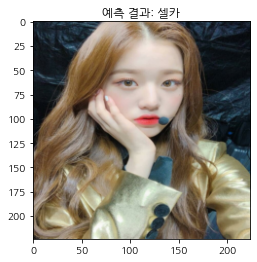

[예측 결과: pinterest 상반신] (실제 정답: 앉은 사진)


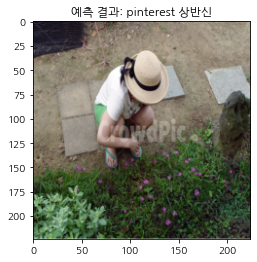

[예측 결과: 앉은 사진] (실제 정답: 앉은 사진)


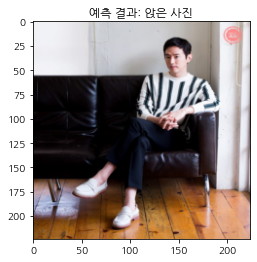

[예측 결과: pinterest 상반신] (실제 정답: pinterest 상반신)


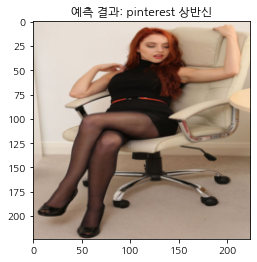

[예측 결과: 앉은 사진] (실제 정답: 앉은 사진)


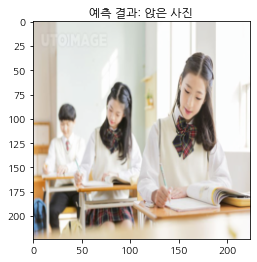

[예측 결과: 앉은 사진] (실제 정답: 앉은 사진)


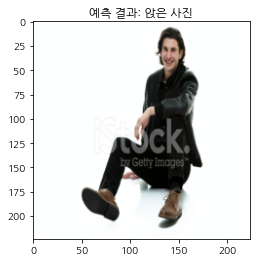

[예측 결과: 셀카] (실제 정답: 셀카)


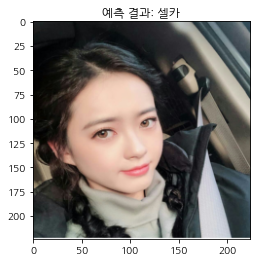

[예측 결과: 셀카] (실제 정답: 셀카)


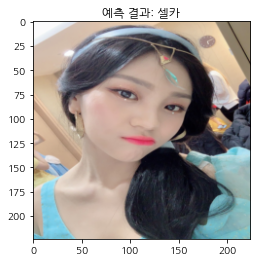

[예측 결과: 셀카] (실제 정답: 셀카)


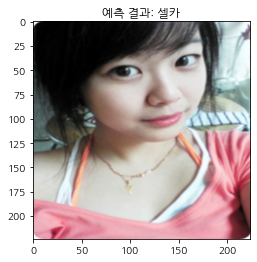

[예측 결과: pinterest 상반신] (실제 정답: pinterest 상반신)


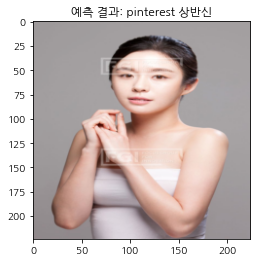

[예측 결과: 전신사진] (실제 정답: 전신사진)


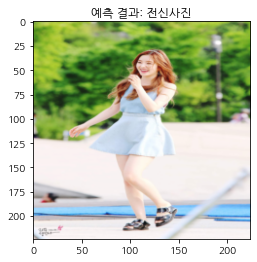

[예측 결과: 전신사진] (실제 정답: 전신사진)


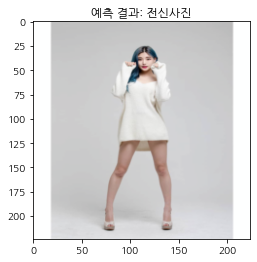

[Test Phase] Loss: 0.4080 Acc: 95.0000% Time: 3.6314s


In [ ]:
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

#### <b>3. 분류 모델 API 개발</b>

* 학습된 분류 모델을 다른 사람이 사용할 수 있도록 API를 개발하여 배포합니다.
* 먼저 한 장의 이미지를 파일로부터 읽어와 분류 결과를 반환하는 기능을 작성합니다.

In [ ]:
# 테스트용 이미지 다운로드하기
!wget https://img.hankyung.com/photo/201906/bbef7d60bd116af47f627f63f221d2a3.jpg -O test_image.jpg

--2023-01-11 07:08:11--  https://img.hankyung.com/photo/201906/bbef7d60bd116af47f627f63f221d2a3.jpg
Resolving img.hankyung.com (img.hankyung.com)... 211.115.109.71
Connecting to img.hankyung.com (img.hankyung.com)|211.115.109.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24483 (24K) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>]  23.91K  --.-KB/s    in 0.07s   

2023-01-11 07:08:12 (339 KB/s) - ‘test_image.jpg’ saved [24483/24483]



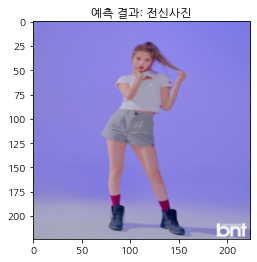

In [ ]:
from PIL import Image


image = Image.open('test_image.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

* 웹 API 개방을 위해 <b>Ngrok</b> 서비스를 이용합니다.
* API 기능 제공을 위해 <b>Flask 프레임워크</b>를 사용합니다.

In [ ]:
# 필요한 라이브러리 설치하기
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!flake_ngrok --version

/bin/bash: flake_ngrok: command not found


In [ ]:
!pip install flask-ngrok2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyngrok==4.1.1
!ngrok authtoken '2IU9g5AthYgGQCVAoTYbpZDEmdl_5RCH17Wj1bp8TJCXAHNHF'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15982 sha256=654b71ebf1b9dbcb0935fe13f3d9e8d16cf8348793a6eb0429913cd36a990bb1
  Stored in directory: /root/.cache/pip/wheels/5e/0a/51/8cb053ccd84481dd3233eba4cdb608bc7a885fd8ca418c0806
Successfully built pyngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!flask-ngrok authtoken '2IU9g5AthYgGQCVAoTYbpZDEmdl_5RCH17Wj1bp8TJCXAHNHF'

/bin/bash: flask-ngrok: command not found


In [ ]:
import io
from pyngrok import ngrok
from flask_ngrok2 import run_with_ngrok
from flask import Flask, jsonify, request


# 이미지를 읽어 결과를 반환하는 함수
def get_prediction(image_bytes):
    image = Image.open(io.BytesIO(image_bytes))
    image = transforms_test(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    return class_names[preds[0]]


app = Flask(__name__)


@app.route('/', methods=['POST'])
def predict():
    if request.method == 'POST':
        # 이미지 바이트 데이터 받아오기
        file = request.files['file']
        image_bytes = file.read()

        # 분류 결과 확인 및 클라이언트에게 결과 반환
        class_name = get_prediction(image_bytes=image_bytes)
        print("결과:", {'class_name': class_name})
        return jsonify({'class_name': class_name})

In [ ]:
# run_with_ngrok(app=app, auth_token='2HJSgyuVEuWE6cQP8KhrNL9f8gh_65Ry8EUC2JHsGVsRhCVa2')
run_with_ngrok(app=app)
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
Exception in thread Thread-23:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/urllib3/connection.py", line 158, in _new_conn
    conn = connection.create_connection(
  File "/usr/local/lib/python3.8/dist-packages/urllib3/util/connection.py", line 80, in create_connection
    raise err
  File "/usr/local/lib/python3.8/dist-packages/urllib3/util/connection.py", line 70, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py", line 597, in urlopen
    Exception in thread Thread-21:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/urllib3/connection.py", line 158, in _new_conn
httplib_response = self._make_request(conn, method, url,
 

#### ngrok & flask 설정 (미사용)


In [ ]:
!ngrok http --region=ap --hostname=expose.ap.ngrok.io 80

Traceback (most recent call last):
  File "/usr/lib/python3.8/subprocess.py", line 1083, in wait
    return self._wait(timeout=timeout)
  File "/usr/lib/python3.8/subprocess.py", line 1806, in _wait
    (pid, sts) = self._try_wait(0)
  File "/usr/lib/python3.8/subprocess.py", line 1764, in _try_wait
    (pid, sts) = os.waitpid(self.pid, wait_flags)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/ngrok", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.8/dist-packages/pyngrok/ngrok.py", line 338, in main
    run(sys.argv[1:])
  File "/usr/local/lib/python3.8/dist-packages/pyngrok/ngrok.py", line 331, in run
    process.run_process(conf.DEFAULT_NGROK_PATH, args)
  File "/usr/local/lib/python3.8/dist-packages/pyngrok/process.py", line 286, in run_process
    subprocess.call(start)
  File "/usr/lib/python3.8/subprocess.py", line 342, in call
    return p.wait(timeout=tim

In [ ]:
!pip install colab-ssh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
NGROK_TOKEN = '2HJSgyuVEuWE6cQP8KhrNL9f8gh_65Ry8EUC2JHsGVsRhCVa2' 
PASSWORD = '1234'

In [ ]:
from colab_ssh import launch_ssh
launch_ssh(NGROK_TOKEN, PASSWORD)

we highly recommend that update your code by following this documentation https://github.com/WassimBenzarti/colab-ssh#getting-started


KeyboardInterrupt: ignored

* API를 개방할 수 있으며 실행할 때마다 서버의 주소가 변경됩니다.
* 서버 주소를 정확히 확인할 필요가 있습니다.

In [ ]:
# authtoken 설정하기
!ngrok authtoken 2HJSgyuVEuWE6cQP8KhrNL9f8gh_65Ry8EUC2JHsGVsRhCVa2

#### 클라이언트 테스트

* 클라이언트 테스트 방법

<pre>
curl -X POST -F file=@{이미지 파일명} {Ngrok 서버 주소}
</pre>

* 사용 예시

<pre>
curl -X POST -F file=@dongseok.jpg http://c4cdb8de3a35.ngrok.io/
</pre>

* 이러한 방식으로 웹, 모바일, 게임 등의 소프트웨어 환경에서 API를 호출하는 방식으로 인공지능 앱을 개발할 수 있습니다.